In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 522 / 522File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [21]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,20.,size=N)
sigma

array([ 1.38312776,  0.20207141,  6.61152841, 17.53741169,  9.35291186,
       18.20962765, 16.94786656, 15.73554829,  0.73024537,  6.16521468,
       15.8431403 ,  2.48142666, 11.59745048,  6.85399048, 19.54029378,
       12.4707602 ,  6.23431791,  5.67185743,  9.98496566,  6.02569871])

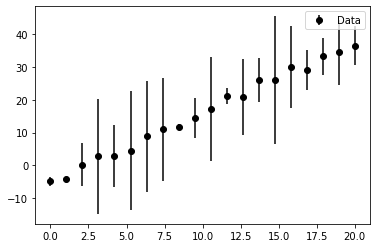

In [22]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [23]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [38]:
# Grado polinomial
n = 10
param = GetFit(x,y,n)
param

array([-4.79078867e+00, -9.03458989e+00,  1.64538088e+01, -9.23631656e+00,
        2.67971883e+00, -4.55145182e-01,  4.78033312e-02, -3.14495622e-03,
        1.26184854e-04, -2.82295372e-06,  2.69913493e-08])

In [39]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [40]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

2.69913493397088e-8*x**10 - 2.82295372455924e-6*x**9 + 0.000126184854124166*x**8 - 0.00314495621659385*x**7 + 0.0478033312334675*x**6 - 0.455145182268717*x**5 + 2.67971883161942*x**4 - 9.23631656221559*x**3 + 16.4538088241099*x**2 - 9.0345898899002*x - 4.79078867196062

In [41]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

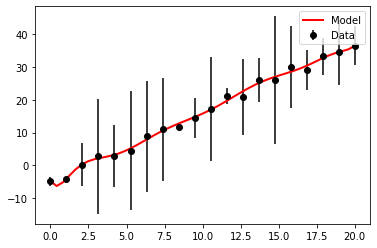

In [42]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()

In [43]:
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    print(sigma2)

In [44]:
Cov = GetError(x,y,param)

1.6226707388935049
